In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

In [2]:
ret = pd.read_excel('/Users/sabyamac/Documents/Online retail project/Online Retail.xlsx')
ret

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Basic data information

In [5]:
import time

In [7]:
%%time
ret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
CPU times: user 60.2 ms, sys: 5.44 ms, total: 65.6 ms
Wall time: 63 ms


In [9]:
ret.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
ret.InvoiceNo.nunique(), ret.StockCode.nunique(), ret.Description.nunique(), ret.CustomerID.nunique(), ret.Country.nunique()

(25900, 4070, 4223, 4372, 38)

In [11]:
ret.Country.value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


## Sales performance analysis

In [13]:
ret[ 'Year' ] = ret.InvoiceDate.apply( lambda x: x.year )
ret[ 'month' ] = ret.InvoiceDate.apply( lambda x: x.month )

In [14]:
ret.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12


In [15]:
ret[ 'week' ] = ret.InvoiceDate.apply( lambda x: x.week)

In [16]:
ret.InvoiceDate.max(), ret.InvoiceDate.min()

(Timestamp('2011-12-09 12:50:00'), Timestamp('2010-12-01 08:26:00'))

In [17]:
ret[ 'amt' ] = ret.Quantity*ret.UnitPrice

### Monthly sales

<Axes: ylabel='Year,month'>

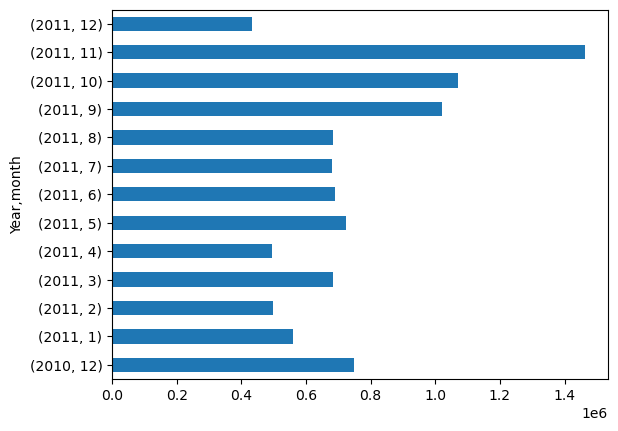

In [19]:
ret.groupby( [ 'Year', 'month' ] ).amt.sum().plot( kind = 'barh')

### Weekly sales

<Axes: xlabel='Year,month,week'>

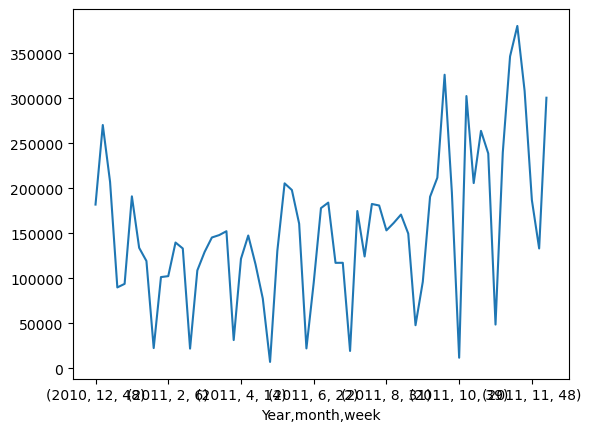

In [21]:
ret.groupby( [ 'Year', 'month', 'week' ] ).amt.sum().plot( kind = 'line')

### Top performing products

In [23]:
ret.groupby( [ 'StockCode'] ).amt.sum().sort_values( ascending = False)

StockCode
DOT             206245.480
22423           164762.190
47566            98302.980
85123A           97894.500
85099B           92356.030
                   ...    
BANK CHARGES     -7175.639
CRUK             -7933.430
B               -11062.060
M               -68674.190
AMAZONFEE      -221520.500
Name: amt, Length: 4070, dtype: float64

In [24]:
ret.loc[ ret.StockCode == 'DOT'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,month,week,amt
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,2010,12,48,569.77
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,2010,12,48,607.49
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,2010,12,48,254.43
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,2010,12,48,121.06
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,2010,12,48,498.47


<Axes: ylabel='StockCode,Description'>

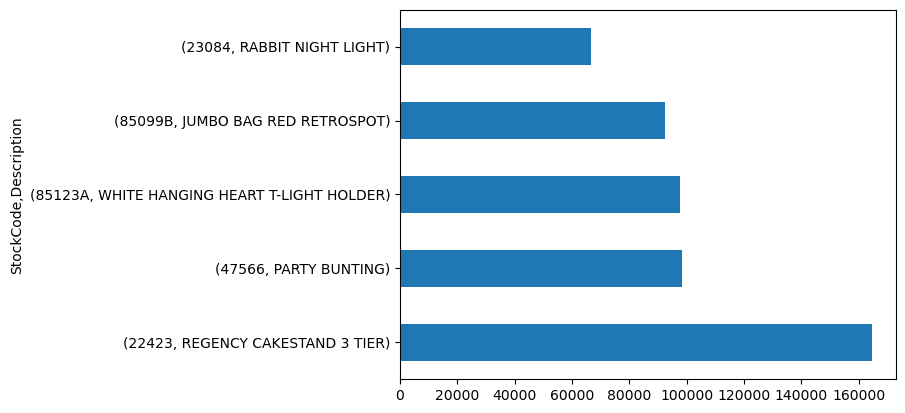

In [25]:
ret.loc[ ret.StockCode != 'DOT' ].groupby( [ 'StockCode', 'Description'] ).amt.sum().sort_values( 
                                                                        ascending = False).head(5).plot( kind = 'barh')

In [26]:
# ret.loc[ ret.StockCode != 'DOT' ].groupby( [ 'Year', 'month', 'StockCode', 'Description' ], as_index = True ).agg( Amount = ( 'amt', 'sum' ),
#                                                                                                   Unitprice = ( 'UnitPrice', 'max'),
#                                                                                                   Qty = ( 'Quantity', 'sum')
#                                                                                                   )

### Top performing customers

<Axes: ylabel='CustomerID,Country'>

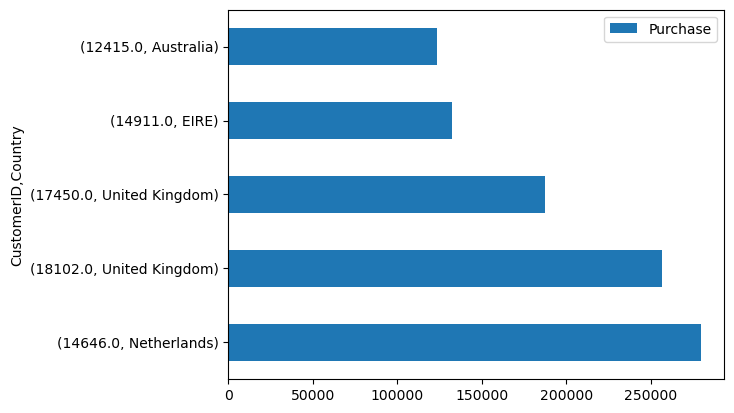

In [28]:
ret.groupby( [ 'CustomerID', 'Country'] ).agg( Purchase = ( 'amt', 'sum') ).sort_values( by = 'Purchase', 
                                                                                        ascending = False).head().plot( kind = 'barh')

## Customer Behaviour analysis

In [30]:
ret.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,month,week,amt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,48,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,48,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,48,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,48,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,48,20.34


In [31]:
## Customers purchase frequency
ret.groupby( [ 'CustomerID' ] ).agg( Bills = ( 'InvoiceNo', 'nunique'),
                                   Billdates = ( 'InvoiceDate', 'nunique'),
                                   Purchase = ( 'amt', 'sum') ).sort_values( by = 'Bills', ascending = False)

,Bills,Billdates,Purchase
CustomerID,,,
14911.0,248,248,132572.62
12748.0,224,225,29072.10
17841.0,169,168,40340.78
14606.0,128,129,11713.85
13089.0,118,114,57385.88
...,...,...,...
13877.0,1,1,117.24
16400.0,1,1,303.93
13878.0,1,1,1281.53


In [32]:
ret[ (ret.CustomerID == 12748) & (ret.InvoiceNo == 550320) ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,month,week,amt
158909,550320,21382,SET/4 SPRING FLOWER DECORATION,3,2011-04-17 12:37:00,2.95,12748.0,United Kingdom,2011,4,15,8.85
158910,550320,84459A,PINK METAL CHICKEN HEART,1,2011-04-17 12:37:00,1.49,12748.0,United Kingdom,2011,4,15,1.49
158911,550320,85203,HANGING WOOD AND FELT BUTTERFLY,6,2011-04-17 12:37:00,0.42,12748.0,United Kingdom,2011,4,15,2.52
158912,550320,84459A,PINK METAL CHICKEN HEART,2,2011-04-17 12:37:00,1.49,12748.0,United Kingdom,2011,4,15,2.98
158913,550320,23155,KNICKERBOCKERGLORY MAGNET ASSORTED,12,2011-04-17 12:37:00,0.83,12748.0,United Kingdom,2011,4,15,9.96
...,...,...,...,...,...,...,...,...,...,...,...,...
158993,550320,22839,3 TIER CAKE TIN GREEN AND CREAM,2,2011-04-17 12:38:00,14.95,12748.0,United Kingdom,2011,4,15,29.90
158994,550320,22427,ENAMEL FLOWER JUG CREAM,2,2011-04-17 12:38:00,5.95,12748.0,United Kingdom,2011,4,15,11.90
158995,550320,21318,GLASS CHALICE BLUE SMALL,12,2011-04-17 12:38:00,0.39,12748.0,United Kingdom,2011,4,15,4.68
158996,550320,22960,JAM MAKING SET WITH JARS,5,2011-04-17 12:38:00,4.25,12748.0,United Kingdom,2011,4,15,21.25


### Average Basket size and bill value for each customer

In [265]:
basket = ret.groupby( [ 'CustomerID' ] ).agg( Bills = ( 'InvoiceNo', 'nunique'),
                                   Items = ( 'StockCode', 'count'),
                                             Unique_items = ( 'StockCode', 'nunique'),
                                   Purchase = ( 'amt', 'sum') ).sort_values( by = 'Bills', ascending = False)

In [267]:
basket[ 'Avg_Items'] = basket.Items/basket.Bills

In [269]:
basket[ 'Avg_bill_value'] = basket.Purchase/basket.Bills

In [271]:
basket

,Bills,Items,Unique_items,Purchase,Avg_Items,Avg_bill_value
CustomerID,,,,,,
14911.0,248,5903,1794,132572.62,23.802419,534.567016
12748.0,224,4642,1769,29072.10,20.723214,129.786161
17841.0,169,7983,1331,40340.78,47.236686,238.702840
14606.0,128,2782,832,11713.85,21.734375,91.514453
13089.0,118,1857,636,57385.88,15.737288,486.321017
...,...,...,...,...,...,...
13877.0,1,3,3,117.24,3.000000,117.240000
16400.0,1,29,28,303.93,29.000000,303.930000
13878.0,1,36,35,1281.53,36.000000,1281.530000


### Return vs. New customers for each month

In [39]:
cust1 = ret.loc[ ret.InvoiceDate < '2011-01-01', 'CustomerID' ].unique()

In [40]:
jan1 = ret.loc[ ret.CustomerID.isin( cust1) & ( ret.InvoiceDate >= '2011-01-01' ) & ( ret.InvoiceDate < '2011-02-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [41]:
jan2 = jan1.drop_duplicates( subset = 'CustomerID').dropna()

In [42]:
jan2.rename( columns = { 'CustomerID' : 'Return_Customer'}, inplace = True )

In [43]:
jan2

,Year,month,Return_Customer
42505,2011,1,18097.0
42514,2011,1,16656.0
42540,2011,1,13094.0
42541,2011,1,17315.0
42557,2011,1,14606.0
...,...,...,...
77133,2011,1,17894.0
77161,2011,1,12668.0
77242,2011,1,17580.0
77572,2011,1,17375.0


In [44]:
jan3 = ret.loc[ (~ret.CustomerID.isin( cust1)) & ( ret.InvoiceDate >= '2011-01-01' ) & ( ret.InvoiceDate < '2011-02-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [45]:
jan4 = jan3.drop_duplicates( subset = 'CustomerID').dropna()

In [46]:
jan4.rename( columns = { 'CustomerID' : 'New_Customer'}, inplace = True )

In [47]:
jan4

,Year,month,New_Customer
42481,2011,1,13313.0
42518,2011,1,16875.0
42687,2011,1,16282.0
42712,2011,1,12957.0
42741,2011,1,14462.0
...,...,...,...
77381,2011,1,17256.0
77410,2011,1,17604.0
77437,2011,1,14006.0
77460,2011,1,13600.0


In [48]:
cust2 = ret.loc[ ret.InvoiceDate < '2011-02-01', 'CustomerID' ].unique()

In [49]:
feb1 = ret.loc[ ret.CustomerID.isin( cust2) & ( ret.InvoiceDate >= '2011-02-01' ) & ( ret.InvoiceDate < '2011-03-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [50]:
feb2 = feb1.drop_duplicates( subset = 'CustomerID').dropna()

In [51]:
feb2.rename( columns = { 'CustomerID' : 'Return_Customer'}, inplace = True )

In [52]:
feb3 = ret.loc[ (~ret.CustomerID.isin( cust2)) & ( ret.InvoiceDate >= '2011-02-01' ) & ( ret.InvoiceDate < '2011-03-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [53]:
feb4 = feb3.drop_duplicates( subset = 'CustomerID').dropna()

In [54]:
feb4.rename( columns = { 'CustomerID' : 'New_Customer'}, inplace = True )

In [55]:
cust3 = ret.loc[ ret.InvoiceDate < '2011-03-01', 'CustomerID' ].unique()

In [56]:
mar1 = ret.loc[ ret.CustomerID.isin( cust3) & ( ret.InvoiceDate >= '2011-03-01' ) & ( ret.InvoiceDate < '2011-04-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [57]:
mar2 = mar1.drop_duplicates( subset = 'CustomerID').dropna()

In [58]:
mar2.rename( columns = { 'CustomerID' : 'Return_Customer'}, inplace = True )

In [59]:
mar3 = ret.loc[ (~ret.CustomerID.isin( cust3)) & ( ret.InvoiceDate >= '2011-03-01' ) & ( ret.InvoiceDate < '2011-04-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [60]:
mar4 = mar3.drop_duplicates( subset = 'CustomerID').dropna()

In [61]:
mar4.rename( columns = { 'CustomerID' : 'New_Customer'}, inplace = True )

In [62]:
cust4 = ret.loc[ ret.InvoiceDate < '2011-04-01', 'CustomerID' ].unique()

In [63]:
apr1 = ret.loc[ ret.CustomerID.isin( cust4) & ( ret.InvoiceDate >= '2011-04-01' ) & ( ret.InvoiceDate < '2011-05-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [64]:
apr2 = apr1.drop_duplicates( subset = 'CustomerID').dropna()

In [65]:
apr2.rename( columns = { 'CustomerID' : 'Return_Customer'}, inplace = True )

In [66]:
apr3 = ret.loc[ (~ret.CustomerID.isin( cust4)) & ( ret.InvoiceDate >= '2011-04-01' ) & ( ret.InvoiceDate < '2011-05-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [67]:
apr4 = apr3.drop_duplicates( subset = 'CustomerID').dropna()

In [68]:
apr4.rename( columns = { 'CustomerID' : 'New_Customer'}, inplace = True )

In [69]:
cust5 = ret.loc[ ret.InvoiceDate < '2011-05-01', 'CustomerID' ].unique()

In [70]:
may1 = ret.loc[ ret.CustomerID.isin( cust5) & ( ret.InvoiceDate >= '2011-05-01' ) & ( ret.InvoiceDate < '2011-06-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [71]:
may2 = may1.drop_duplicates( subset = 'CustomerID').dropna()

In [72]:
may2.rename( columns = { 'CustomerID' : 'Return_Customer'}, inplace = True )

In [73]:
may3 = ret.loc[ (~ret.CustomerID.isin( cust5)) & ( ret.InvoiceDate >= '2011-05-01' ) & ( ret.InvoiceDate < '2011-06-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [74]:
may4 = may3.drop_duplicates( subset = 'CustomerID').dropna()

In [75]:
may4.rename( columns = { 'CustomerID' : 'New_Customer'}, inplace = True )

In [76]:
cust6 = ret.loc[ ret.InvoiceDate < '2011-06-01', 'CustomerID' ].unique()

In [77]:
jun1 = ret.loc[ ret.CustomerID.isin( cust6) & ( ret.InvoiceDate >= '2011-06-01' ) & ( ret.InvoiceDate < '2011-07-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [78]:
jun2 = jun1.drop_duplicates( subset = 'CustomerID').dropna()

In [79]:
jun2.rename( columns = { 'CustomerID' : 'Return_Customer'}, inplace = True )

In [80]:
jun3 = ret.loc[ (~ret.CustomerID.isin( cust6)) & ( ret.InvoiceDate >= '2011-06-01' ) & ( ret.InvoiceDate < '2011-07-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [81]:
jun4 = jun3.drop_duplicates( subset = 'CustomerID').dropna()

In [82]:
jun4.rename( columns = { 'CustomerID' : 'New_Customer'}, inplace = True )

In [83]:
cust7 = ret.loc[ ret.InvoiceDate < '2011-07-01', 'CustomerID' ].unique()

In [84]:
jul1 = ret.loc[ ret.CustomerID.isin( cust7) & ( ret.InvoiceDate >= '2011-07-01' ) & ( ret.InvoiceDate < '2011-08-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [85]:
jul2 = jul1.drop_duplicates( subset = 'CustomerID').dropna()

In [86]:
jul2.rename( columns = { 'CustomerID' : 'Return_Customer'}, inplace = True )

In [87]:
jul3 = ret.loc[ (~ret.CustomerID.isin( cust7)) & ( ret.InvoiceDate >= '2011-07-01' ) & ( ret.InvoiceDate < '2011-08-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [88]:
jul4 = jul3.drop_duplicates( subset = 'CustomerID').dropna()

In [89]:
jul4.rename( columns = { 'CustomerID' : 'New_Customer'}, inplace = True )

In [90]:
cust8 = ret.loc[ ret.InvoiceDate < '2011-08-01', 'CustomerID' ].unique()

In [91]:
aug1 = ret.loc[ ret.CustomerID.isin( cust8) & ( ret.InvoiceDate >= '2011-08-01' ) & ( ret.InvoiceDate < '2011-09-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [92]:
aug2 = aug1.drop_duplicates( subset = 'CustomerID').dropna()

In [93]:
aug2.rename( columns = { 'CustomerID' : 'Return_Customer'}, inplace = True )

In [94]:
aug3 = ret.loc[ (~ret.CustomerID.isin( cust8)) & ( ret.InvoiceDate >= '2011-08-01' ) & ( ret.InvoiceDate < '2011-09-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [95]:
aug4 = aug3.drop_duplicates( subset = 'CustomerID').dropna()

In [96]:
aug4.rename( columns = { 'CustomerID' : 'New_Customer'}, inplace = True )

In [97]:
cust9 = ret.loc[ ret.InvoiceDate < '2011-09-01', 'CustomerID' ].unique()

In [98]:
sep1 = ret.loc[ ret.CustomerID.isin( cust9) & ( ret.InvoiceDate >= '2011-09-01' ) & ( ret.InvoiceDate < '2011-10-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [99]:
sep2 = sep1.drop_duplicates( subset = 'CustomerID').dropna()

In [100]:
sep2.rename( columns = { 'CustomerID' : 'Return_Customer'}, inplace = True )

In [101]:
sep3 = ret.loc[ (~ret.CustomerID.isin( cust9)) & ( ret.InvoiceDate >= '2011-09-01' ) & ( ret.InvoiceDate < '2011-10-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [102]:
sep4 = sep3.drop_duplicates( subset = 'CustomerID').dropna()

In [103]:
sep4.rename( columns = { 'CustomerID' : 'New_Customer'}, inplace = True )

In [104]:
cust10 = ret.loc[ ret.InvoiceDate < '2011-10-01', 'CustomerID' ].unique()

In [105]:
oct1 = ret.loc[ ret.CustomerID.isin( cust10) & ( ret.InvoiceDate >= '2011-10-01' ) & ( ret.InvoiceDate < '2011-11-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [106]:
oct2 = oct1.drop_duplicates( subset = 'CustomerID').dropna()

In [107]:
oct2.rename( columns = { 'CustomerID' : 'Return_Customer'}, inplace = True )

In [108]:
oct3 = ret.loc[ (~ret.CustomerID.isin( cust10)) & ( ret.InvoiceDate >= '2011-10-01' ) & ( ret.InvoiceDate < '2011-11-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [109]:
oct4 = oct3.drop_duplicates( subset = 'CustomerID').dropna()

In [110]:
oct4.rename( columns = { 'CustomerID' : 'New_Customer'}, inplace = True )

In [111]:
cust11 = ret.loc[ ret.InvoiceDate < '2011-11-01', 'CustomerID' ].unique()

In [112]:
nov1 = ret.loc[ ret.CustomerID.isin( cust11) & ( ret.InvoiceDate >= '2011-11-01' ) & ( ret.InvoiceDate < '2011-12-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [113]:
nov2 = nov1.drop_duplicates( subset = 'CustomerID').dropna()

In [114]:
nov2.rename( columns = { 'CustomerID' : 'Return_Customer'}, inplace = True )

In [115]:
nov3 = ret.loc[ (~ret.CustomerID.isin( cust11)) & ( ret.InvoiceDate >= '2011-11-01' ) & ( ret.InvoiceDate < '2011-12-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [116]:
nov4 = nov3.drop_duplicates( subset = 'CustomerID').dropna()

In [117]:
nov4.rename( columns = { 'CustomerID' : 'New_Customer'}, inplace = True )

In [118]:
cust12 = ret.loc[ ret.InvoiceDate < '2011-12-01', 'CustomerID' ].unique()

In [119]:
dec1 = ret.loc[ ret.CustomerID.isin( cust12) & ( ret.InvoiceDate >= '2011-12-01' ) & ( ret.InvoiceDate < '2012-01-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [120]:
dec2 = dec1.drop_duplicates( subset = 'CustomerID').dropna()

In [121]:
dec2.rename( columns = { 'CustomerID' : 'Return_Customer'}, inplace = True )

In [122]:
dec3 = ret.loc[ (~ret.CustomerID.isin( cust12)) & ( ret.InvoiceDate >= '2011-12-01' ) & ( ret.InvoiceDate < '2012-01-01' ), 
                                                                [ 'Year', 'month', 'CustomerID'] ]

In [123]:
dec4 = dec3.drop_duplicates( subset = 'CustomerID').dropna()

In [124]:
dec4.rename( columns = { 'CustomerID' : 'New_Customer'}, inplace = True )

In [125]:
return_cust = pd.concat( [ jan2, feb2, mar2, apr2, may2, jun2, jul2, aug2, sep2, oct2, nov2, dec2 ], ignore_index = True)

In [126]:
return_cust.groupby( [ 'Year', 'month'] ).agg( Return_customers = ( 'Return_Customer', 'nunique'))

Return_customers
Year month                  
2011 1                   362
     2                   418
     3                   580
     4                   600
     5                   800
     6                   816
     7                   802
     8                   813
     9                  1004
     10                 1073
     11                 1390
     12                  645

In [127]:
nw = pd.concat( [ jan4, feb4, mar4, apr4, may4, jun4, jul4, aug4, sep4, oct4, nov4, dec4 ], ignore_index = True)

In [128]:
nw.groupby( [ 'Year', 'month'] ).agg( New_customers = ( 'New_Customer', 'nunique'))

New_customers
Year month               
2011 1                421
     2                380
     3                440
     4                299
     5                279
     6                235
     7                191
     8                167
     9                298
     10               352
     11               321
     12                41